# Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
df_train.columns = df_train.columns.str.replace(' ','_')
df_test.columns = df_test.columns.str.replace(' ','_')

df_train.info()
df_train['Premium_Amount'].describe().round(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual_Income         1155051 non-null  float64
 4   Marital_Status        1181471 non-null  object 
 5   Number_of_Dependents  1090328 non-null  float64
 6   Education_Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health_Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy_Type           1200000 non-null  object 
 11  Previous_Claims       835971 non-null   float64
 12  Vehicle_Age           1199994 non-null  float64
 13  Credit_Score          1062118 non-null  float64
 14  Insurance_Duration    1199999 non-

count    1200000.0
mean        1103.0
std          865.0
min           20.0
25%          514.0
50%          872.0
75%         1509.0
max         4999.0
Name: Premium_Amount, dtype: float64

# Age

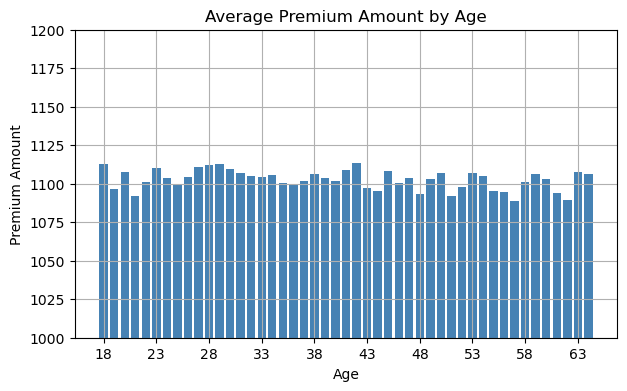

In [42]:
ages = df_train[['Age','Premium_Amount']].groupby(["Age"]).mean()

plt.figure(figsize=(7, 4))
plt.bar(ages.index, ages['Premium_Amount'], color='steelblue')
plt.xticks(range(int(ages.index.min()), int(ages.index.max()) + 1, 5))
plt.xlabel('Age')
plt.ylabel('Premium Amount')
plt.title('Average Premium Amount by Age')
plt.ylim(1000,1200)
plt.grid(True)
plt.show()

# Gender


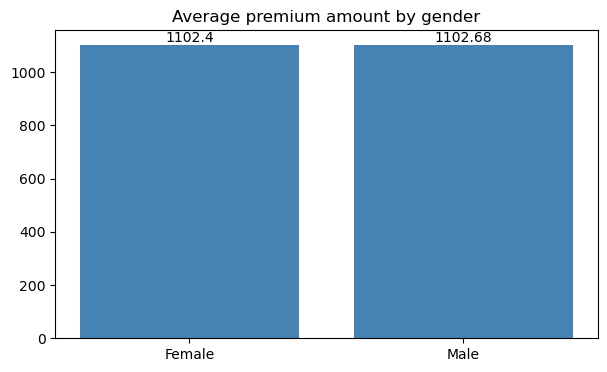

In [5]:
genders = df_train[["Gender", "Premium_Amount"]].groupby("Gender").mean()
plt.figure(figsize=(7,4))
bars = plt.bar(genders.index, genders['Premium_Amount'],color='steelblue')
plt.title('Average premium amount by gender')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Annual income

In [39]:
ranges = list(range(0,150001,5000))
df_train['income_group'] = pd.cut(df_train['Annual_Income'], bins = ranges, right=False, labels = [f"{b}-{b+5000}" for b in ranges[:-1]])
income_ranges = df_train[['income_group','Premium_Amount']].groupby('income_group').mean();

/var/folders/ys/51b3zzbs6j5gjmgqqp_s_ts40000gn/T/ipykernel_45447/3494753511.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_ranges = df_train[['income_group','Premium_Amount']].groupby('income_group').mean();


Text(0.5, 0, 'Annual income range')

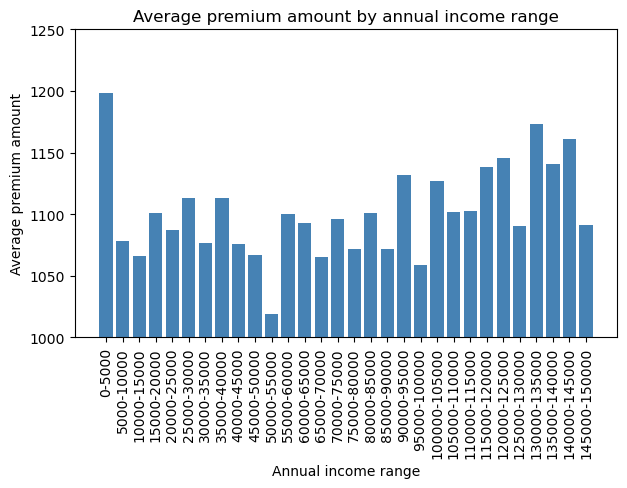

In [32]:
plt.figure(figsize=(7,4))
bars = plt.bar(income_ranges.index,income_ranges['Premium_Amount'], color='steelblue')
plt.xticks(rotation=90)
plt.ylim(1000,1250)
plt.title("Average premium amount by annual income range")
plt.ylabel("Average premium amount")
plt.xlabel("Annual income range")


# Marital Status

In [40]:
df_train['Marital_Status'].value_counts(dropna=False)

Marital_Status
Single      395391
Married     394316
Divorced    391764
NaN          18529
Name: count, dtype: int64

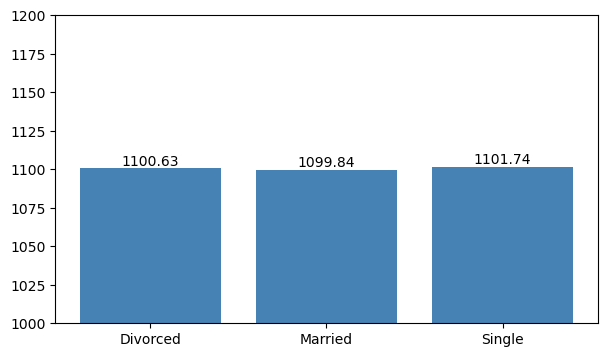

In [51]:
marital_groups = df_train[['Marital_Status','Premium_Amount']].groupby('Marital_Status').mean()
plt.figure(figsize=(7,4))
bars = plt.bar(marital_groups.index, marital_groups['Premium_Amount'], color='steelblue')
plt.ylim(1000,1200)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Number of Dependents

In [58]:
df_train['Number_of_Dependents'].value_counts(dropna=False)

Number_of_Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
NaN    109672
Name: count, dtype: int64

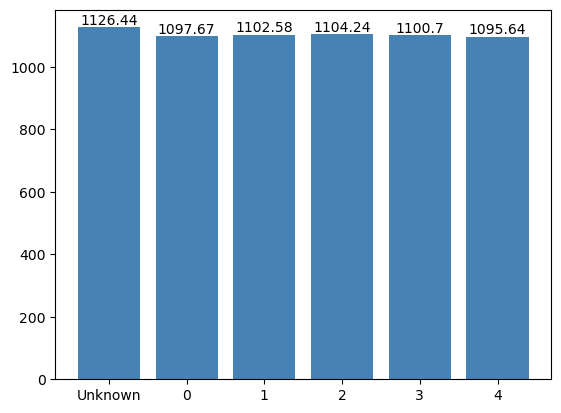

In [73]:
df_train['Number_of_Dependents'] = df_train['Number_of_Dependents'].fillna(-1)
dependents = df_train[['Number_of_Dependents', 'Premium_Amount']].groupby('Number_of_Dependents').mean()

dependents.index = dependents.index.astype(int).astype(str)
dependents.index = dependents.index.str.replace('-1', 'Unknown')

bars = plt.bar(dependents.index, dependents['Premium_Amount'], color='steelblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Education Level

In [74]:
df_train['Education_Level'].value_counts(dropna=False)

Education_Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

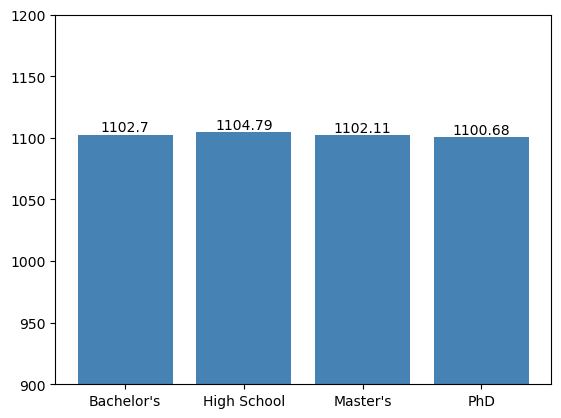

In [77]:
education = df_train[['Education_Level', "Premium_Amount"]].groupby('Education_Level').mean()
bars = plt.bar(education.index, education['Premium_Amount'], color='steelblue')
plt.ylim(900,1200)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Occupation

In [ ]:
df_train['Occupation'].fillna('Unknown')
df_train[['Occupation', 'Premium_Amount']].groupby('Occupation').mean()
occupation = 

,Premium_Amount
Occupation,
Employed,1107.400895
Self-Employed,1106.609284
Unemployed,1105.369023
